# Support Vector Regression (SVR)

## Importing the libraries

In [62]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

## Importing the dataset

In [63]:
data_set = pd.read_csv("./Position_Salaries.csv").values

X = data_set[:,1:-1]
y = data_set[:,-1]


## Feature Scaling

In [64]:
# transform "y" into a 2d array because the Scaler expects a 2d array 
# y.reshape(row,col)
y = y.reshape(len(y),1)

from sklearn.preprocessing import StandardScaler
'''because the StandardScaler computes the mean and standard deviation for scaling, and these statistics are different for X and y we need two fitters.'''
sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)


## Training the SVR model on the whole dataset

In [65]:
from sklearn import svm

svr_model = svm.SVR(kernel='rbf')

svr_model.fit(X,y)


/home/dododoyo/Documents/Work/ML/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [66]:
# we must enter a transformed version
scaled_prediction = svr_model.predict(sc_X.transform([[6.5]]))
# format scaled predition into 2D-array
array_scaled_prediction = scaled_prediction.reshape(-1,1)

real_prediction = sc_y.inverse_transform(array_scaled_prediction)

## Visualising the SVR results

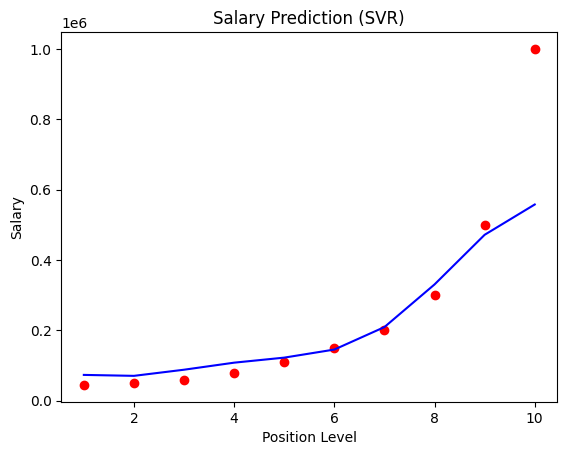

In [67]:
y_prediction = svr_model.predict(X)
y_scaled_prediction = y_prediction.reshape(-1, 1)
real_prediction = sc_y.inverse_transform(y_scaled_prediction)

plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),color = "red")

plt.plot(sc_X.inverse_transform(X),real_prediction,color='blue')

plt.title("Salary Prediction (SVR)")
plt.xlabel("Position Level")
plt.ylabel("Salary")

plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

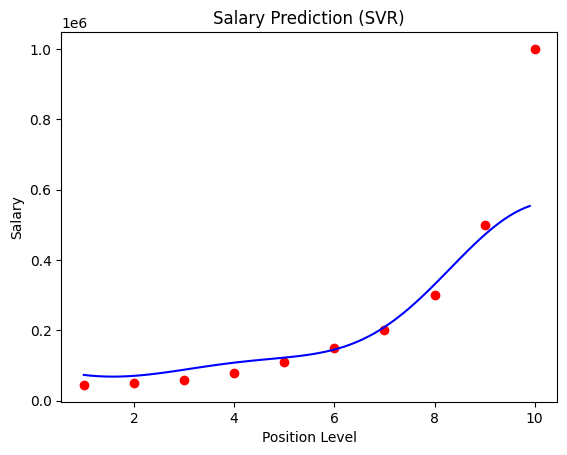

In [68]:
# reverse back the scaled features
reverseScaled_X = sc_X.inverse_transform(X)
reverseScaled_y = sc_y.inverse_transform(y)


X_grid = np.arange(np.min(reverseScaled_X),np.max(reverseScaled_X),0.1)
X_grid = X_grid.reshape(len(X_grid),1)

# the X_grid is made with the reverse scaled feature 
# so we have to scale it again
scaledX = sc_X.transform(X_grid)

y_prediction = svr_model.predict(scaledX)
y_fit_prediction = y_prediction.reshape(-1, 1)


real_prediction = sc_y.inverse_transform(y_fit_prediction)

plt.scatter(reverseScaled_X, reverseScaled_y, color="red")

plt.plot(X_grid ,real_prediction, color='blue')

plt.title("Salary Prediction (SVR)")
plt.xlabel("Position Level")
plt.ylabel("Salary")

plt.show()